In [40]:
#Brayan Steven León Martinez - Taller 22 - Matemáticas Computacional

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import copy
from math import sqrt

x1=[0,2,2.5,1,4,7]
x2=[0,1,2,3,6,2]
y=[2.5,5.5,5,0,1.5,13]
n=len(x1)

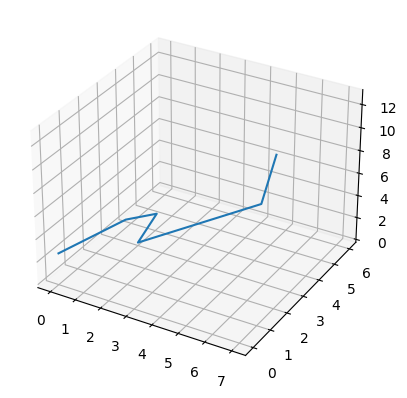

In [41]:
# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

# Datos en array bi-dimensional
q = np.array([[0,2,2.5,1,4,7]])
w = np.array([[0,1,2,3,6,2]])
e = np.array([[2.5,5.5,5,0,1.5,13]])

# plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.plot_wireframe(q, w, e)

# Mostramos el gráfico
plt.show()

In [42]:
multx1x2 = []
highx12 = []
highx22 = []
multx1y = []
multx2y = []
for i in range(n):
    multx1x2.append(x1[i]*x2[i])
    highx12.append(x1[i]**2)
    highx22.append(x2[i]**2)
    multx1y.append(x1[i]*y[i])
    multx2y.append(x2[i]*y[i])

In [43]:
sumatoria_x1=sum(x1)
sumatoria_x2=sum(x2)
sumatoria_y=sum(y)
sumatoria_multx1x2=sum(multx1x2)
sumatoria_highx12=sum(highx12)
sumatoria_highx22=sum(highx22)
sumatoria_multx1y=sum(multx1y)
sumatoria_multx2y=sum(multx2y)
promedio_y=sumatoria_y/n

In [44]:
a = [[n, sumatoria_x1, sumatoria_x2], [sumatoria_x1, sumatoria_highx12, sumatoria_multx1x2], [sumatoria_x2, sumatoria_multx1x2, sumatoria_highx22]]
b = [sumatoria_y, sumatoria_multx1y, sumatoria_multx2y]
matrizGauss = gaussJordan(a, b)

Matriz inicial
6 16.5 14 | 27.5
16.5 76.25 48.0 | 120.5
14 48.0 54 | 50.5

pivote: 6, i: 0
División
1.0 2.75 2.3333333333333335 | 4.583333333333333
16.5 76.25 48.0 | 120.5
14 48.0 54 | 50.5

Reducción
1.0 2.75 2.3333333333333335 | 4.583333333333333
0.0 30.875 9.5 | 44.875
0.0 9.5 21.33333333333333 | -13.666666666666657

pivote: 30.875, i: 1
División
1.0 2.75 2.3333333333333335 | 4.583333333333333
0.0 1.0 0.3076923076923077 | 1.4534412955465588
0.0 9.5 21.33333333333333 | -13.666666666666657

Reducción
1.0 0.0 1.4871794871794872 | 0.5863697705802964
0.0 1.0 0.3076923076923077 | 1.4534412955465588
0.0 0.0 18.410256410256405 | -27.474358974358964

pivote: 18.410256410256405, i: 2
División
1.0 0.0 1.4871794871794872 | 0.5863697705802964
0.0 1.0 0.3076923076923077 | 1.4534412955465588
0.0 0.0 1.0 | -1.4923398328690807

Reducción
1.0 0.0 0.0 | 2.8057469579240575
0.0 1.0 0.0 | 1.912622782583199
0.0 0.0 1.0 | -1.4923398328690807



In [45]:
a0=matrizGauss[0]
a1=matrizGauss[1]
a2=matrizGauss[2]
print("a0: " + str(a0))
print("a1: " + str(a1))
print("a2: " + str(a2))

a0: 2.8057469579240575
a1: 1.912622782583199
a2: -1.4923398328690807


In [55]:
print("z: " + str(a0) + " + " + str(a1) + "x + " + str(a2) + "y")

z: 2.8057469579240575 + 1.912622782583199x + -1.4923398328690807y


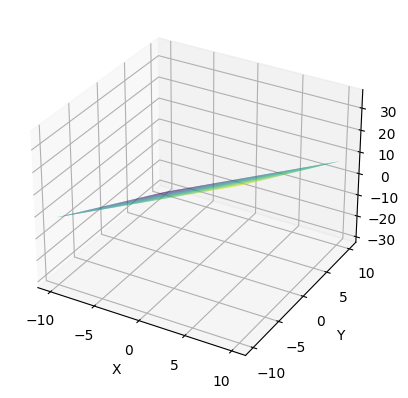

In [56]:
# Definir la ecuación
def ecuacion(x, y):
    return 2.8057469579240575 + 1.912622782583199 * x - 1.4923398328690807 * y

# Crear una malla de valores de x e y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Calcular los valores de z
Z = ecuacion(X, Y)

# Graficar los resultados
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [51]:
stArray = []
srArray = []
for i in range(n):
    stArray.append((y[i]-promedio_y)**2)
    srArray.append((y[i]-a0-(a1*x1[i])-(a2*x2[i]))**2)

In [52]:
st=sum(stArray)
sr=sum(srArray)
print("St: " + str(st))
print("Sr: " + str(sr))

St: 106.70833333333336
Sr: 0.4840749157015101


In [54]:
r2 = (st-sr)/st
coef = sqrt(r2)*100
print("Coef. Determinación  (r2): " + str(r2))
print("Coef. Correlación (r): " + str(coef))

Coef. Determinación  (r2): 0.995463569708381
Coef. Correlación (r): 99.77292066028642


In [6]:
def imprimirSistema(a, b, etiqueta):
    n = len(b)
    print(etiqueta)
    for i in range(n):
        for j in range(n):
            print(a[i][j], end = " ")
        print("|", b[i])
    print()

In [7]:
def gaussJordan(ao, bo):
    a = copy.deepcopy(ao)
    b = copy.copy(bo)

    n = len(b)
    imprimirSistema(a, b, "Matriz inicial")
    for i in range(n):
        pivote = a[i][i]
        if(pivote == 0):
            for j in range(i+1, n):
                pivoteCorreccion = a[j][i]
                if(pivoteCorreccion != 0):
                    tempA = a[j]
                    tempB = b[j]
                    a[j] = a[i]
                    b[j] = b[i]
                    a[i] = tempA
                    b[i] = tempB
                    break
        pivote = a[i][i]
        print("pivote: " + str(pivote) + ", i: " + str(i))
        #Dividir por el pivote
        for j in range(n):
            a[i][j] /= pivote
        b[i] /= pivote
        imprimirSistema(a, b, "División")

        #Reducción
        for k in range(n):
            if i != k:
                #Se reduce
                valorAux = -a[k][i]
                for j in range(n):
                    a[k][j] += a[i][j] * valorAux
                b[k] += b[i] * valorAux
        imprimirSistema(a, b, "Reducción")

    return b